---
# Imports
---

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=True,fontsize=24)
import sys

sys.path.append('../../')
import McMillan.Maps.Maps as maps
import McMillan.Plotting.McMPlots as mcmplt



---
# Example with Henon map
---

In [2]:

x,px,a,b,c,d = sp.symbols('x p_x a b c d',real=True,positive=True)

#=========================
# MAP

xp  =  px
pxp =  -x +a*px + px**3

#=========================

print('Map')
display(xp,pxp)

henon = maps.Map1D(xp,pxp,x,px)

Map


$(p,q) \to (\epsilon q,\epsilon p)$

# Perturbation theory requires us to look for solutions of the form

$$ K = K_0 + \varepsilon K_1 + \varepsilon^2 K_2 + \dots$$

In [14]:
display(henon.K0)
display(henon.K1)
display(henon.K2)
display(henon.K3)

# We have our perturbation expansion of the map

In [15]:
display(henon.q_eps)
display(henon.p_eps)

# So we can solve for the coefficients by minimizing the residue
### Note: this leaves us with a free parameter: the courant-snyder invariant. We can set it to 1 since the invariant can be rescaled. Free parameters at higher orders will need to be minmized in a better fashion


In [16]:
display(henon.residue(order = 0))
henon.solve_C(order = 0,verbose=True,auto_update=True)
display(henon.K0.collect(henon.C_cs))

------------------------------------------------------------


------------------------------------------------------------


### If we insert the Floqet coordinates and set $C_{cs} = \beta/2$, we find back the action!

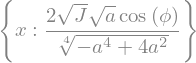

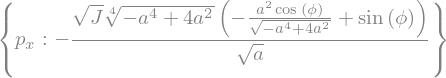

Invariant 0th order


In [26]:
display({henon.q :henon.q_flq})
display({henon.p :henon.p_flq})

invariant = henon.K0.subs({henon.q:henon.q_flq,henon.p:henon.p_flq},simultaneous=True).simplify().subs({henon.C_cs:henon.beta/2}).simplify()
print('Invariant 0th order')
display(invariant)

---

# We just found the 0th order Invariant:

<lambdifygenerated-6>:2: RuntimeWarning: overflow encountered in scalar power
  return p_x**3 + 0.5*p_x - x
<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return p_x**3 + 0.5*p_x - x


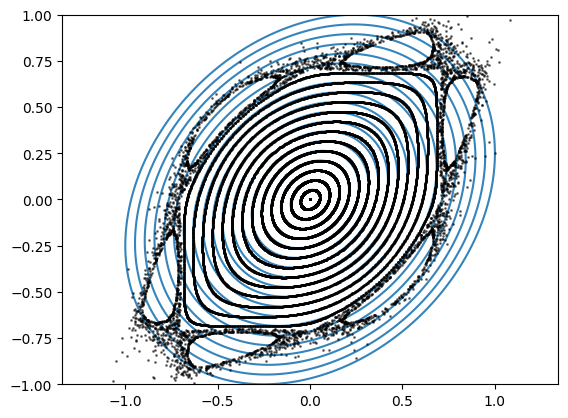

In [3]:
# ex: a=2

x,px,a,b,c,d = sp.symbols('x p_x a b c d',real=True)

#=========================
# MAP
a = 0.5
xp  =  px
pxp =  -x +a*px + px**3

henon_tmp = maps.Map1D(xp,pxp,x,px)

ORDER = 0
# Solve for C
for n in range(ORDER+1):
    henon_tmp.solve_C(order = n)
#=========================
plt.figure()

x_points = np.linspace(0,1,20)
px_points = 0.25*np.linspace(0,1,20)

mcmplt.plot_invariant(henon_tmp.K0.subs({henon.C_cs:henon.beta/2}),henon_tmp.q,henon_tmp.p,eval_at=[x_points,px_points],colors='C0',alpha=0.9)
for part_x,part_px in zip(x_points,px_points):
    _x,_px =  henon_tmp.iterate(part_x,part_px,2000)
    plt.plot(_x,_px,'o',color='k',alpha=0.5,ms=1,label='space')

plt.axis('equal')
plt.xlim(-1,1)
plt.ylim(-1,1)

----
# Minimization procedure
---

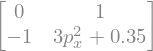

In [52]:
henon.jacobian

------------------------------------------------------------


<lambdifygenerated-6>:2: RuntimeWarning: overflow encountered in scalar power
  return p_x**3 + 0.7*p_x**2 + 0.4*p_x - x
<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return p_x**3 + 0.7*p_x**2 + 0.4*p_x - x


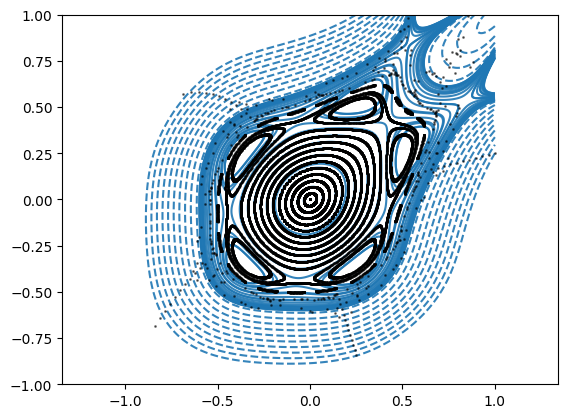

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=True,fontsize=24)
import sys

sys.path.append('../../')
import McMillan.Maps.Maps as maps
import McMillan.Plotting.McMPlots as mcmplt




x,px,a,b,c,d = sp.symbols('x p_x a b c d',real=True,positive=True)

#=========================
# MAP
a = 0.4
b = 0.7
c = 1
xp  =  px
pxp =  -x +a*px + b*px**2 + c*px**3

henon = maps.Map1D(xp,pxp,x,px)

ORDER = 6


for n in range(ORDER+1):
    henon.solve_C(order = n,verbose=False,at_machine_precision=False)



henon.update({henon.C_cs:1},verbose=True)
henon.minimize_multiple_residue(order=ORDER,verbose=True)



plt.figure()

x_points = np.linspace(0,1,30)
px_points = 0.25*np.linspace(0,1,30)

mcmplt.plot_invariant(henon.Kofn(ORDER).subs({henon.eps:1}),henon.q,henon.p,eval_at=[x_points,px_points],colors='C0',alpha=0.9)
for part_x,part_px in zip(x_points,px_points):
    _x,_px =  henon.iterate(part_x,part_px,2000)
    plt.plot(_x,_px,'o',color='k',alpha=0.5,ms=1,label='space')

plt.axis('equal')
plt.xlim(-1,1)
plt.ylim(-1,1)

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=True,fontsize=24)
import sys

sys.path.append('../../')
import McMillan.Maps.Maps as maps
import McMillan.Plotting.McMPlots as mcmplt




x,px,a,b,c,d = sp.symbols('x p_x a b c d',real=True,positive=True)

#=========================
# MAP
a = 0.61
xp  =  px
pxp =  -x +a*px + px**3

henon = maps.Map1D(xp,pxp,x,px)

ORDER = 12


for n in range(ORDER+1):
    henon.solve_C(order = n,verbose=False,at_machine_precision=True)



henon.update({henon.C_cs:1},verbose=True)
henon.minimize_multiple_residue(order=ORDER,verbose=True)



plt.figure()

x_points = np.linspace(0,1,30)
px_points = 0.25*np.linspace(0,1,30)

mcmplt.plot_invariant(henon.Kofn(ORDER).subs({henon.eps:1}),henon.q,henon.p,eval_at=[x_points,px_points],colors='C0',alpha=0.9)
for part_x,part_px in zip(x_points,px_points):
    _x,_px =  henon.iterate(part_x,part_px,2000)
    plt.plot(_x,_px,'o',color='k',alpha=0.5,ms=1,label='space')

plt.axis('equal')
plt.xlim(-1,1)
plt.ylim(-1,1)

ValueError: not enough values to unpack (expected 1, got 0)

------------------------------------------------------------


------------------------------------------------------------


------------------------------------------------------------


<lambdifygenerated-9>:2: RuntimeWarning: overflow encountered in scalar power
  return p_x**3 + 0.7*p_x**2 + 0.4*p_x - x
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return p_x**3 + 0.7*p_x**2 + 0.4*p_x - x


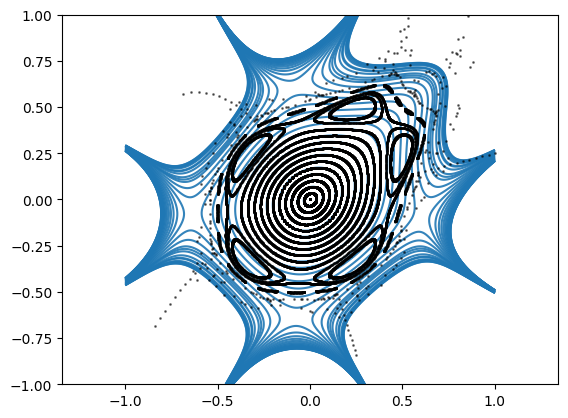

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=True,fontsize=24)
import sys

sys.path.append('../../')
import McMillan.Maps.Maps as maps
import McMillan.Plotting.McMPlots as mcmplt




x,px,a,b,c,d = sp.symbols('x p_x a b c d',real=True,positive=True)

#=========================
# MAP
a = 0.4
b = 0.7
c = 1
xp  =  px
pxp =  -x +a*px + b*px**2 + c*px**3

henon = maps.Map1D(xp,pxp,x,px)

ORDER = 6

# henon.solve_C(order = n,verbose=False)



for n in range(ORDER+1):
    henon.solve_C(order = n,verbose=False)



henon.update({henon.C_cs:1},verbose=True)
# henon.minimize_multiple_residue(order=ORDER,verbose=True)


# henon.update({henon.C_cs:1},verbose=True)
# henon.minimize_residue(order=2,verbose=True)
henon.minimize_residue(order=2,verbose=True)
henon.minimize_residue(order=4,verbose=True)
henon.minimize_residue(order=6,verbose=True)
# henon.minimize_residue(order=6,verbose=True)
# henon.minimize_residue(order=6,verbose=True)

# henon.update({henon.C[0,4]:-1},verbose=True)
# henon.update({henon.C[0,6]:-1},verbose=True)
# henon.minimize_residue(order=2,verbose=True)
# henon.minimize_residue(order=6,verbose=True)
# henon.minimize_residue(order=6,verbose=True)


# henon.solve_C(order = 5,verbose=False)
# henon.solve_C(order = 6,verbose=False)
# henon.solve_C(order = 7,verbose=False)
# henon.solve_C(order = 8,verbose=False)
# henon.minimize_residue(order=6,verbose=True)




# henon.update({henon.C_cs:henon.beta/2},verbose=True)
# for n in [1,2,3,4,5,6]:
#     try:
#         henon.minimize_residue(order=n,verbose=True)
#     except:
#         pass


# henon.minimize_residue(order=8,verbose=True)
# henon.minimize_residue(order=8)

plt.figure()

x_points = np.linspace(0,1,30)
px_points = 0.25*np.linspace(0,1,30)

mcmplt.plot_invariant(henon.Kofn(ORDER).subs({henon.eps:1}),henon.q,henon.p,eval_at=[x_points,px_points],colors='C0',alpha=0.9)
for part_x,part_px in zip(x_points,px_points):
    _x,_px =  henon.iterate(part_x,part_px,2000)
    plt.plot(_x,_px,'o',color='k',alpha=0.5,ms=1,label='space')

plt.axis('equal')
plt.xlim(-1,1)
plt.ylim(-1,1)

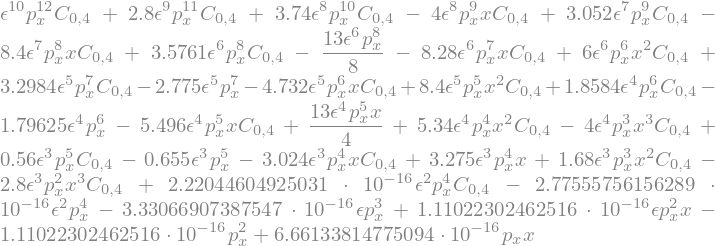

In [8]:
henon.residue(2)

In [2]:
order = 5

to_cancel = self.residue(order).as_coefficients_dict(self.eps)[self.eps**order]
eq_list = list(to_cancel.as_coefficients_dict(self.p,self.q).values())
solutions, = sp.linsolve(eq_list,[self.C[i] for i in self.lex_power(order)])
# display(solutions)
{self.C[i]:henon.cropnum(s) for i,s in zip(self.lex_power(order),solutions)}


In [40]:
order = 4

to_cancel = self.residue(order).as_coefficients_dict(self.eps)[self.eps**order]
eq_list = list(to_cancel.as_coefficients_dict(self.p,self.q).values())
solutions, = sp.linsolve(eq_list,[self.C[i] for i in self.lex_power(order)])
# display(solutions)
{self.C[i]:henon.cropnum(s) for i,s in zip(self.lex_power(order),solutions)}


In [15]:
order = 2

to_cancel = self.residue(order).as_coefficients_dict(self.eps)[self.eps**order]
eq_list = list(to_cancel.as_coefficients_dict(self.p,self.q).values())
sp.solve(eq_list,[self.C[i] for i in self.lex_power(order)])
# {self.C[i]:henon.cropnum(s) for i,s in zip(self.lex_power(order),solutions)}

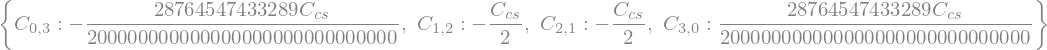

In [72]:
{self.C[i]:s.nsimplify() for i,s in zip(self.lex_power(order),solutions)}

In [85]:
_test = lambda x: x.is_Number and abs(x) < 1e-15, lambda x: 0

In [88]:
solutions[0].replace(lambda x: x.is_Number and abs(x) < 1e-15, lambda x: 0)

In [82]:
sp.Basic.replace()

TypeError: Basic.replace() missing 3 required positional arguments: 'self', 'query', and 'value'

In [80]:
type(solutions[0])

sympy.core.mul.Mul

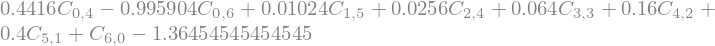

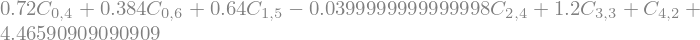

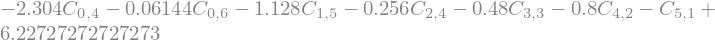

In [8]:
for eq in eq_list:
    display(eq)

In [22]:
sp.solve(eq_list[1:],[self.C[i] for i in self.lex_power(order)])

In [23]:
sp.solve(eq_list,[self.C[i] for i in self.lex_power(order)])

In [31]:
sp.solve(eq_list[1:],[self.C[i] for i in self.lex_power(order)] + [self.C[0,4]])

In [35]:
[self.C[i] for i in self.lex_power(order)][:3]

In [43]:
type(sp.solve(eq_list[1:],[self.C[i] for i in self.lex_power(order)],overdetermined='best'))

dict

In [4]:
x,px,a,b,c,d = sp.symbols('x p_x a b c d',real=True,positive=True)

#=========================
# MAP
a = 0.52
xp  =  px
pxp =  -x +a*px + px**3

henon = maps.Map1D(xp,pxp,x,px)

ORDER = 10

# henon.solve_C(order = n,verbose=False)



for n in range(ORDER+1):
    henon.solve_C(order = n,verbose=False)

henon.solve_C(order =11,verbose=False)
henon.solve_C(order = 12,verbose=True)



KeyboardInterrupt: 

In [3]:
plt.figure()

x_points = np.linspace(0,1,20)
px_points = 0.5*np.linspace(0,1,20)

mcmplt.plot_invariant(henon.Kofn(ORDER).subs({henon.eps:1}),henon.q,henon.p,eval_at=[x_points,px_points],colors='C0',alpha=0.9)
for part_x,part_px in zip(x_points,px_points):
    _x,_px =  henon.iterate(part_x,part_px,2000)
    plt.plot(_x,_px,'o',color='k',alpha=0.5,ms=1,label='space')

plt.plot(x_points,px_points,'-',color='C3',alpha=0.9,ms=5,label='space')
plt.axis('equal')
plt.xlim(-1,1)
plt.ylim(-1,1)

TypeError: 'Symbol' object is not subscriptable

<Figure size 640x480 with 0 Axes>

<lambdifygenerated-6>:2: RuntimeWarning: overflow encountered in scalar power
  return p_x**3 + 0.7*p_x**2 + 0.4*p_x - x
<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return p_x**3 + 0.7*p_x**2 + 0.4*p_x - x


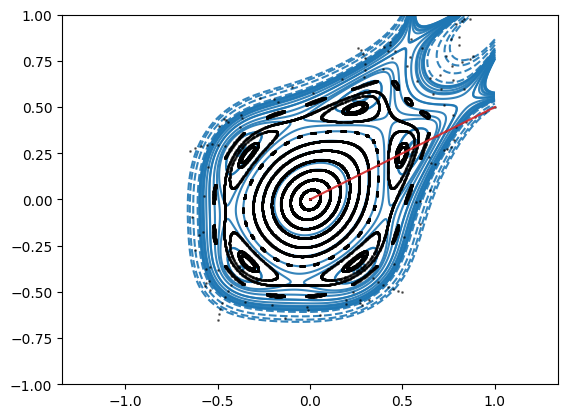

In [7]:
plt.figure()

x_points = np.linspace(0,1,20)
px_points = 0.5*np.linspace(0,1,20)

mcmplt.plot_invariant(henon.Kofn(ORDER).subs({henon.eps:1}),henon.q,henon.p,eval_at=[x_points,px_points],colors='C0',alpha=0.9)
for part_x,part_px in zip(x_points,px_points):
    _x,_px =  henon.iterate(part_x,part_px,2000)
    plt.plot(_x,_px,'o',color='k',alpha=0.5,ms=1,label='space')

plt.plot(x_points,px_points,'-',color='C3',alpha=0.9,ms=5,label='space')
plt.axis('equal')
plt.xlim(-1,1)
plt.ylim(-1,1)

<lambdifygenerated-6>:2: RuntimeWarning: overflow encountered in scalar power
  return p_x**3 + 0.7*p_x**2 + 0.4*p_x - x
<lambdifygenerated-6>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return p_x**3 + 0.7*p_x**2 + 0.4*p_x - x


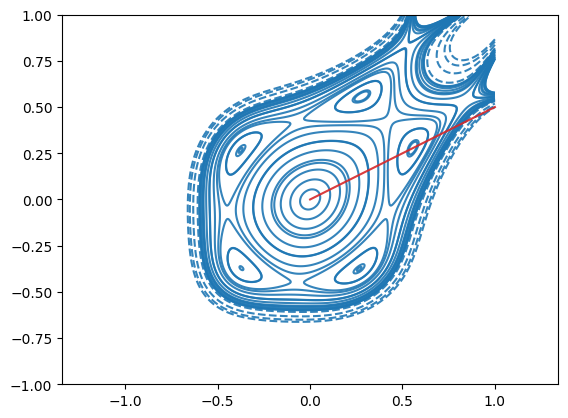

In [6]:
plt.figure()

x_points = np.linspace(0,1,20)
px_points = 0.5*np.linspace(0,1,20)

mcmplt.plot_invariant(henon.Kofn(ORDER).subs({henon.eps:1}),henon.q,henon.p,eval_at=[x_points,px_points],colors='C0',alpha=0.9)
for part_x,part_px in zip(x_points,px_points):
    _x,_px =  henon.iterate(part_x,part_px,2000)
    # plt.plot(_x,_px,'o',color='k',alpha=0.5,ms=1,label='space')

plt.plot(x_points,px_points,'-',color='C3',alpha=0.9,ms=5,label='space')
plt.axis('equal')
plt.xlim(-1,1)
plt.ylim(-1,1)

<lambdifygenerated-42>:2: RuntimeWarning: overflow encountered in scalar power
  return p_x**3 + 0.52*p_x - x
<lambdifygenerated-42>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return p_x**3 + 0.52*p_x - x


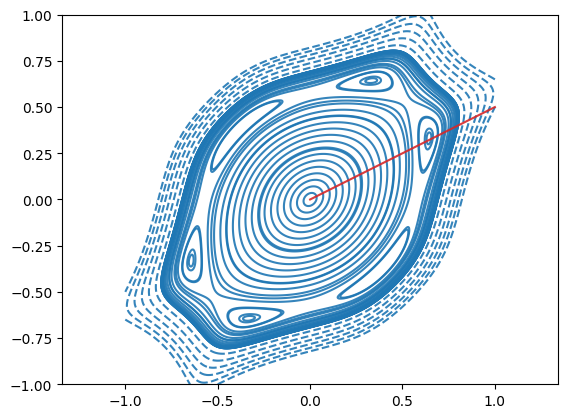

In [18]:
plt.figure()

x_points = np.linspace(0,1,30)
px_points = 0.5*np.linspace(0,1,30)

mcmplt.plot_invariant(henon.Kofn(ORDER).subs({henon.eps:1}),henon.q,henon.p,eval_at=[x_points,px_points],colors='C0',alpha=0.9)
for part_x,part_px in zip(x_points,px_points):
    _x,_px =  henon.iterate(part_x,part_px,2000)
    # plt.plot(_x,_px,'o',color='k',alpha=0.5,ms=1,label='space')

plt.plot(x_points,px_points,'-',color='C3',alpha=0.9,ms=5,label='space')
plt.axis('equal')
plt.xlim(-1,1)
plt.ylim(-1,1)

In [4]:
henon.minimize_multiple_residue(order=6,verbose=True)

------------------------------------------------------------


array([ 3.83801157, -2.02733986])

In [67]:
_Cij = _residue.free_symbols - _residue.atoms(sp.Symbol)

In [58]:
tuple(_Cij)

TypeError: 'Indexed' object is not iterable

In [68]:
_Cij

In [71]:
(self.phi,*(_Cij))

In [72]:
sp.lambdify((self.phi,*(_Cij)),_residue**2)

<function _lambdifygenerated(phi, Dummy_28949, Dummy_28950)>

In [52]:
_Cij

In [77]:
type(_Cij)

set

In [91]:
_fun(phi,*Cij)

NameError: name 'phi' is not defined

In [97]:
_fun(0,*(set([2,0])))

In [93]:
_Cij

In [106]:
_Cij = _residue.free_symbols - _residue.atoms(sp.Symbol)
_fun = sp.lambdify((self.phi,*(_Cij)),_residue**2)

def avg_residue(x):
    Cij = tuple(x)
    print(x,Cij)
    return scipy.integrate.quad(lambda phi:_fun(phi,*Cij),0,2*np.pi)[0]

x0 = (0.,0.)
avg_residue(x0)

(0.0, 0.0) (0.0, 0.0)


In [88]:
scipy.optimize.minimize(avg_residue,[0,0])

TypeError: _lambdifygenerated() missing 1 required positional argument: 'Dummy_28974'

In [112]:
_values = scipy.optimize.minimize(avg_residue, x0=[0,0]).x

subs = {}
for _values,_C in zip(_values,_Cij):
    subs = {**subs,**{_C:_values}}

In [114]:
_Cij

In [118]:
_values

array([ 3.83801157, -2.02733986])

In [119]:
self = henon
order=6
import scipy 
eps_terms = self.residue(order=order).expand().as_coefficients_dict(self.eps)
_keys = list(eps_terms.keys())
if 1 in _keys:
    _keys.remove(1)
lead_pwr = min([key.args[1] for key in _keys if key.args[1]>order])

_residue = eps_terms[self.eps**lead_pwr]
_residue = _residue.subs({self.q:self.q_flq,self.p:self.p_flq},simultaneous=True).subs({self.J:1})

# _residue = (self.residue(order=order).expand()+ sp.O(self.eps**(lead_pwr+1))).removeO()
# _residue = _residue.subs({self.q:self.q_flq,self.p:self.p_flq},simultaneous=True).subs({self.J:1,self.eps:1})

# Cij found in the expression
#----
# _Cij = list((_residue.free_symbols - _residue.atoms(sp.Symbol)))[0]
# _fun = sp.lambdify((self.phi,_Cij),_residue**2)
#---
_Cij = _residue.free_symbols - _residue.atoms(sp.Symbol)
_fun = sp.lambdify((self.phi,*(_Cij)),_residue**2)


def avg_residue(x):
    Cij = tuple(x)
    return scipy.integrate.quad(lambda phi:_fun(phi,*Cij),0,2*np.pi)[0]

_values = scipy.optimize.minimize(avg_residue, x0=list(np.zeros(len(_Cij)))).x

to_sub = {}
for _val,_C in zip(_values,_Cij):
    to_sub = {**to_sub,**{_C:_val}}

display(to_sub)

------------------------------------------------------------


------------------------------------------------------------


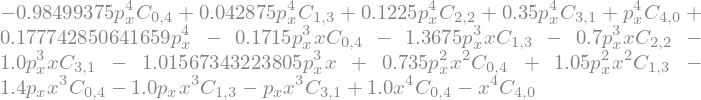

In [57]:
x,px,a,b,c,d = sp.symbols('x p_x a b c d',real=True,positive=True)

#=========================
# MAP
a = 0.35
xp  =  px
pxp =  -x +a*px + px**3

henon = maps.Map1D(xp,pxp,x,px)

ORDER = 8

# henon.solve_C(order = n,verbose=False)



# for n in range(ORDER+1):
    # henon.solve_C(order = n,verbose=False)

henon.solve_C(order = 0,verbose=False)
# henon.update({henon.C_cs:henon.beta/2},verbose=True)

henon.solve_C(order = 1,verbose=True)
# henon.solve_C(order = 2,verbose=True)
henon.update({henon.C_cs:henon.beta/2},verbose=True)


order = 2
self = henon
K =  self.Kofn(order)
_residue =  (K.subs({self.q:self.truncate(self.q_eps,order+4),
                        self.p:self.truncate(self.p_eps,order+4)},simultaneous=True) - K).expand()
_residue.as_coefficients_dict(henon.eps)[henon.eps**2]

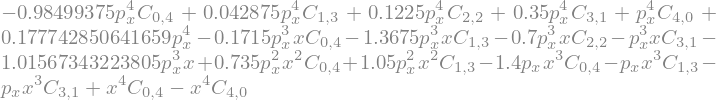

In [64]:
_residue =  (K.subs({self.q:self.q_eps,
                        self.p:self.p_eps},simultaneous=True) - K).expand()
_residue.as_coefficients_dict(henon.eps)[henon.eps**2]

<lambdifygenerated-195>:2: RuntimeWarning: overflow encountered in scalar power
  return p_x**3 + 0.35*p_x - x
<lambdifygenerated-195>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return p_x**3 + 0.35*p_x - x


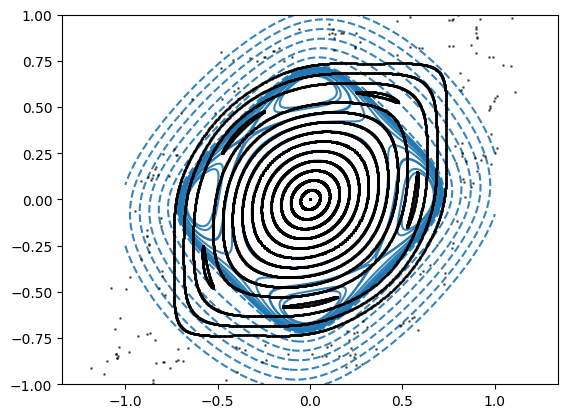

In [18]:

plt.figure()

x_points = np.linspace(0,1,20)
px_points = 0.25*np.linspace(0,1,20)

mcmplt.plot_invariant(henon.Kofn(ORDER).subs({henon.eps:1}),henon.q,henon.p,eval_at=[x_points,px_points],colors='C0',alpha=0.9)
for part_x,part_px in zip(x_points,px_points):
    _x,_px =  henon.iterate(part_x,part_px,2000)
    plt.plot(_x,_px,'o',color='k',alpha=0.5,ms=1,label='space')

plt.axis('equal')
plt.xlim(-1,1)
plt.ylim(-1,1)

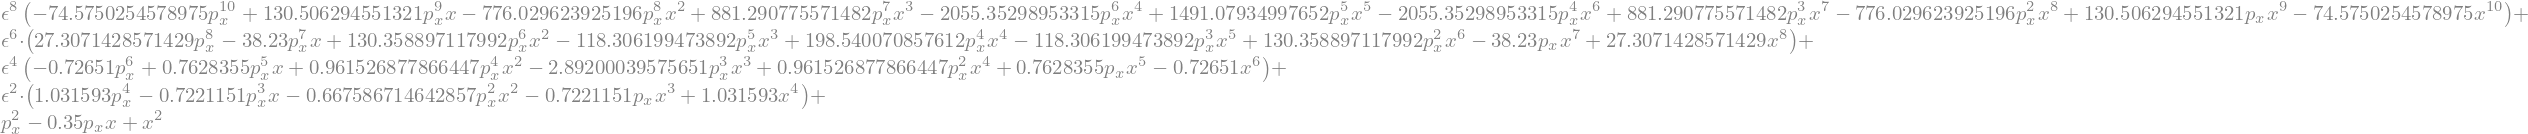

In [16]:
eps_terms = self.residue(order=order).expand().as_coefficients_dict(self.eps)
        _keys = list(eps_terms.keys())
        if 1 in _keys:
            _keys.remove(1)
        lead_pwr = min([key.args[1] for key in _keys if key.args[1]>order])

        _residue = eps_terms[self.eps**lead_pwr]

3.508772
2.927205
nan
2.346533
2.073807
1.960323
1.767677
1.685247
1.542134
1.422222
1.369295
1.27499
1.193521
1.156825
1.090289
1.060047
1.004777
0.955548
0.93291
0.891107
0.853402
0.835913
0.803368
0.773734
0.759899
0.734003
0.721876
0.699114
0.678168
0.668319
0.649766
0.63262
0.624534
0.609264
0.595111
0.588424
0.575778
0.569801
0.558492
0.547993
0.54303
0.533645
0.524942
0.520833
0.513078
0.509422
0.502535
0.49619
0.493213
0.487635


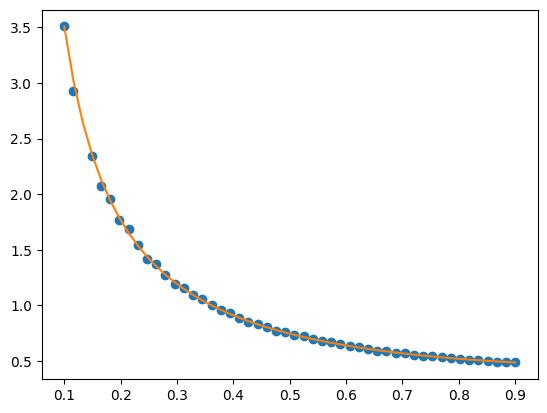

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=True,fontsize=24)
import sys

sys.path.append('../../')
import McMillan.Maps.Maps as maps
import McMillan.Plotting.McMPlots as mcmplt


def test(_a):
    return -7/5*1/(_a*(_a**2-4))

a_vec = np.linspace(0.1,0.9,50)

C_list = []
for _a in a_vec:
    try:
        x,px,a,b,c,d = sp.symbols('x p_x a b c d',real=True,positive=True)

        #=========================
        # MAP
        a = round(_a,2)
        xp  =  px
        pxp =  -x +a*px + px**3

        henon = maps.Map1D(xp,pxp,x,px)

        ORDER = 2


        for n in range(ORDER+1):
            henon.solve_C(order = n,verbose=False)


        henon.update({henon.C_cs:1},verbose=False)
        _C = henon.minimize_residue(order=2,verbose=False)

    except:
        _C = np.nan
    print(_C)
    C_list.append(_C)


plt.figure()
plt.plot(a_vec,C_list,'o')
plt.plot(a_vec,test(a_vec))


3.508772
2.927205
nan
2.346533
2.073807
1.960323
1.767677
1.685247
1.542134
1.422222
1.369295
1.27499
1.193521
1.156825
1.090289
1.060047
1.004777
0.955548
0.93291
0.891107
0.853402
0.835913
0.803368
0.773734
0.759899
0.734003
0.721876
0.699114
0.678168
0.668319
0.649766
0.63262
0.624534
0.609264
0.595111
0.588424
0.575778
0.569801
0.558492
0.547993
0.54303
0.533645
0.524942
0.520833
0.513078
0.509422
0.502535
0.49619
0.493213
0.487635


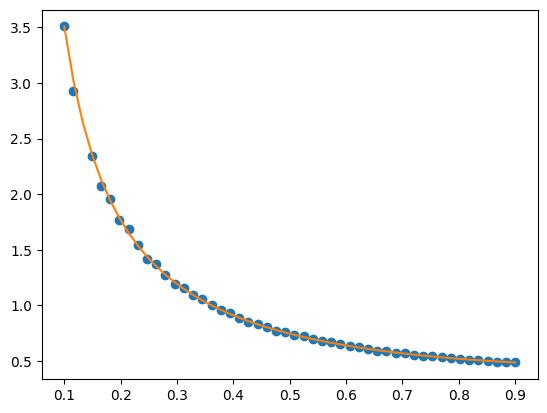

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=True,fontsize=24)
import sys

sys.path.append('../../')
import McMillan.Maps.Maps as maps
import McMillan.Plotting.McMPlots as mcmplt


def test(_a):
    return -7/5*1/(_a*(_a**2-4))

a_vec = np.linspace(0.1,0.9,50)

C_list = []
for _a in a_vec:
    try:
        x,px,a,b,c,d = sp.symbols('x p_x a b c d',real=True,positive=True)

        #=========================
        # MAP
        a = round(_a,2)
        xp  =  px
        pxp =  -x +a*px + px**3

        henon = maps.Map1D(xp,pxp,x,px)

        ORDER = 2


        for n in range(ORDER+1):
            henon.solve_C(order = n,verbose=False)


        henon.update({henon.C_cs:1},verbose=False)
        _C = henon.minimize_residue(order=2,verbose=False)

    except:
        _C = np.nan
    print(_C)
    C_list.append(_C)


plt.figure()
plt.plot(a_vec,C_list,'o')
plt.plot(a_vec,test(a_vec))


In [30]:
order=8
self = henon 
eps_terms = self.residue(order=order).expand().as_coefficients_dict(self.eps)
_keys = list(eps_terms.keys())
if 1 in _keys:
    _keys.remove(1)
lead_pwr = min([key.args[1] for key in _keys if key.args[1]>order])

_residue = eps_terms[self.eps**(lead_pwr)]

In [42]:
test = self.residue(order=6).expand()

In [43]:
test.free_symbols

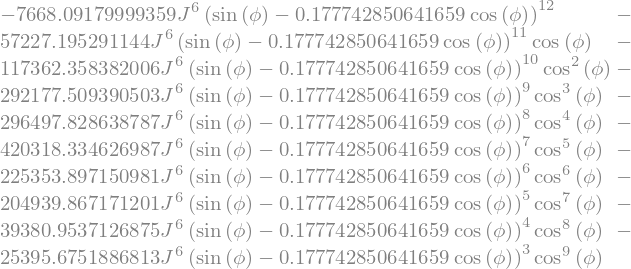

In [31]:
_residue.subs({self.q:self.q_flq,self.p:self.p_flq},simultaneous=True)

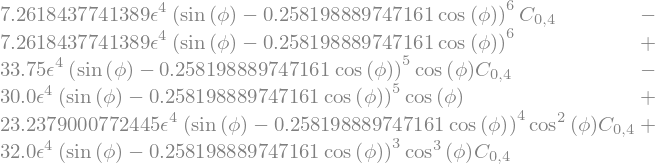

In [6]:
_residue

In [9]:
(self.residue(order=order).expand()+ sp.O(self.eps**(lead_pwr+1))).removeO()

In [10]:
eps_terms = self.residue(order=order).expand().as_coefficients_dict(self.eps)
_keys = list(eps_terms.keys())
if 1 in _keys:
    _keys.remove(1)
lead_pwr = min([key.args[1] for key in _keys if key.args[1]>order])

_residue = self.residue(order=order).expand() + sp.O(self.eps**lead_pwr) #(eps_terms + sp.O(self.eps**lead_pwr))

In [13]:
eps_terms

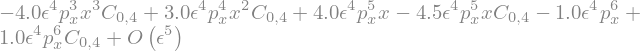

In [15]:
 self.residue(order=order).expand() + sp.O(self.eps**(lead_pwr+1))

In [4]:
_residue = eps_terms[self.eps**lead_pwr]
_residue = _residue.subs({self.q:self.q_flq,self.p:self.p_flq},simultaneous=True).subs({self.J:1})

# Cij found in the expression
_Cij = list((_residue.free_symbols - _residue.atoms(sp.Symbol)))[0]

IndexError: list index out of range

In [5]:
eps_terms

In [12]:
lead_pwr

In [10]:
_residuea

<lambdifygenerated-18>:2: RuntimeWarning: overflow encountered in scalar power
  return p_x**3 + 0.47*p_x - x
<lambdifygenerated-18>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return p_x**3 + 0.47*p_x - x


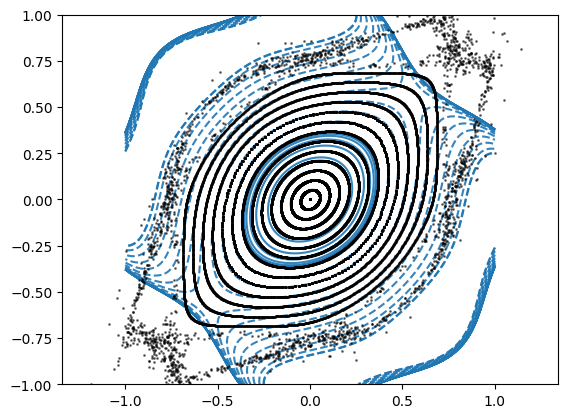

In [7]:
plt.figure()

x_points = np.linspace(0,1,20)
px_points = 0.25*np.linspace(0,1,20)

mcmplt.plot_invariant(henon.Kofn(ORDER).subs({henon.eps:1}),henon.q,henon.p,eval_at=[x_points,px_points],colors='C0',alpha=0.9)
for part_x,part_px in zip(x_points,px_points):
    _x,_px =  henon.iterate(part_x,part_px,2000)
    plt.plot(_x,_px,'o',color='k',alpha=0.5,ms=1,label='space')

plt.axis('equal')
plt.xlim(-1,1)
plt.ylim(-1,1)

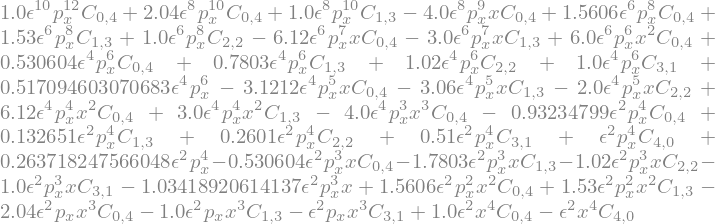

In [4]:
henon.residue(order=2)

In [8]:
henon.K2

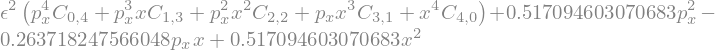

In [9]:
henon.Kofn(2)

In [22]:
_keys

dict_keys([epsilon**2, epsilon**6, epsilon**4, epsilon**10, epsilon**8, 1])

In [23]:
_keys = list(eps_terms.keys())
_keys.remove(1)
[key.args[1] for key in _keys]

In [16]:
[key.args[1] for key in eps_terms.keys()]

IndexError: tuple index out of range

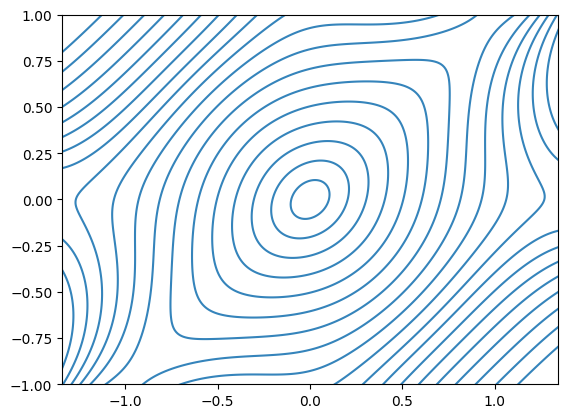

In [39]:

plt.figure()

x_points = np.linspace(0,2,20)
px_points = 0.25*np.linspace(0,2,20)

mcmplt.plot_invariant(henon.Kofn(6).subs({henon.eps:1}),henon_tmp.q,henon_tmp.p,eval_at=[x_points,px_points],colors='C0',alpha=0.9)
# for part_x,part_px in zip(x_points,px_points):
    # _x,_px =  henon.iterate(part_x,part_px,2000)
    # plt.plot(_x,_px,'o',color='k',alpha=0.5,ms=1,label='space')

plt.axis('equal')
plt.xlim(-1,1)
plt.ylim(-1,1)

In [26]:
np.round(np.float64(henon.beta/2),6)

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=True,fontsize=24)
import sys

sys.path.append('../../')
import McMillan.Maps.Maps as maps
import McMillan.Plotting.McMPlots as mcmplt




x,px,a,b,c,d = sp.symbols('x p_x a b c d',real=True,positive=True)

#=========================
# MAP
a = 0.41
xp  =  px
pxp =  -x +a*px + px**3

henon = maps.Map1D(xp,pxp,x,px)

# for n in range(10):
henon.solve_C(order = 0,verbose=True)
henon.solve_C(order = 1,verbose=True)
henon.solve_C(order = 2,verbose=True)
henon.solve_C(order = 3,verbose=True)
henon.solve_C(order = 4,verbose=True)
henon.solve_C(order = 5,verbose=True)
henon.solve_C(order = 6,verbose=True)
henon.solve_C(order = 7,verbose=True)
henon.solve_C(order = 8,verbose=True)
henon.solve_C(order = 9,verbose=True)
henon.solve_C(order = 10,verbose=True)

------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------
------------------------------------------------------------


------------------------------------------------------------


In [9]:
henon.Kofn(8).preorder_traversal()3

AttributeError: 'Add' object has no attribute 'preorder_traversal'

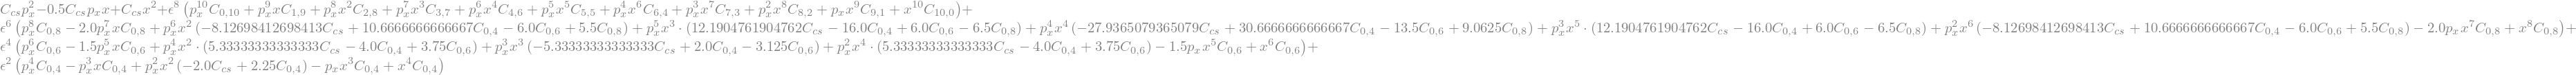

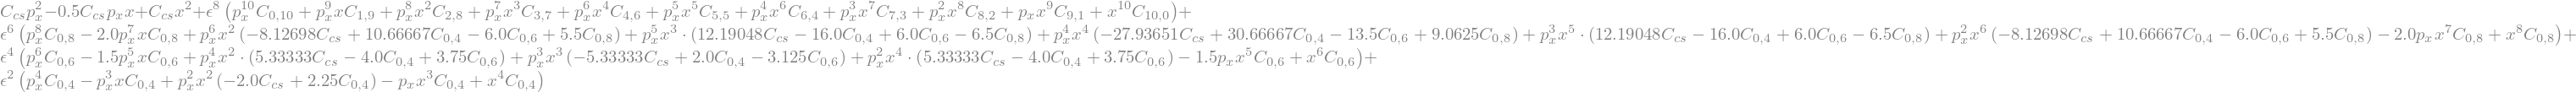

In [15]:

_expr = henon.Kofn(8)
display(_expr)
for _term in _expr.atoms():
    if isinstance(_term, sp.Float):
        _expr = _expr.subs(_term, round(_term, 5))

display(_expr)


In [46]:
sum(henon.a[ij[0],ij[1]]*henon.q**ij[0]*henon.p**ij[1] for ij in henon.a_values.keys())

In [49]:
sum(henon.b[i,j]*henon.q**i*henon.p**j for (i,j) in henon.b_values.keys())

In [26]:

x,px,a,b,c,d = sp.symbols('x p_x a b c d',real=True,positive=True)

#=========================
# MAP
a = 0.5
xp  =  px
pxp =  -x +a*px + px**3

henon = maps.Map1D(xp,pxp,x,px)

# ORDER = 2
# # Solve for C
# for n in range(ORDER+1):
#     henon.solve_C(order = n,verbose=True)
#=========================

henon.solve_C(order = 0,verbose=False)
henon.update({henon.C_cs:1})

henon.solve_C(order = 1,verbose=False)

henon.solve_C(order = 2,verbose=False)
henon.update({henon.C[0,4]:0.74666})
# henon.minimize_residue(order = 2,verbose=True)

henon.solve_C(order = 3,verbose=False)
henon.solve_C(order = 4,verbose=True)
henon.minimize_residue(order = 4,verbose=True)

------------------------------------------------------------


------------------------------------------------------------


IndexError: list index out of range

In [56]:
eps_terms =  henon.residue(order=4).expand().as_coefficients_dict(henon.eps)
lead_pwr = min([key.args[1] for key in eps_terms.keys() if key.args[1]>4])



In [57]:
lead_pwr

In [17]:
result = sp.integrate((_kernel.subs({henon.C_cs:1,henon.q:henon.q_flq,henon.p:henon.p_flq}))**2,(henon.phi,0,2*sp.pi)).simplify().diff(henon.C[0,4]).simplify()

In [18]:
final = sp.solve([result],[henon.C[0,4]])[henon.C[0,4]]

In [40]:
final.simplify().subs({a:0.5})

In [15]:
sp.factor(sp.sqrt(4-a**2))

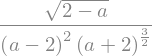

In [16]:
sp.factor(sp.sqrt(4-a**2))/sp.factor(a**4 - 8*a**2 + 16)

In [25]:
henon.J

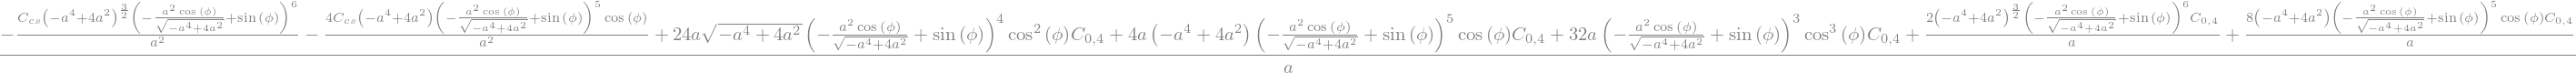

In [32]:
a

In [36]:
import scipy 

_residue = henon.residue(order=2).expand().leadterm(henon.eps)[0]
_residue = _residue.subs({henon.q:henon.q_flq,henon.p:henon.p_flq},simultaneous=True).subs({henon.J:1}).subs({a:0.5,henon.C_cs:1})
_fun = sp.lambdify((henon.phi,henon.C[0,4]),_residue**2)

def avg_residue(Cij):
    _i = 0
    _f = 2*np.pi    
    return scipy.integrate.quad(lambda phi:_fun(phi,Cij),_i,_f)[0]

In [43]:
_fun(0,2)

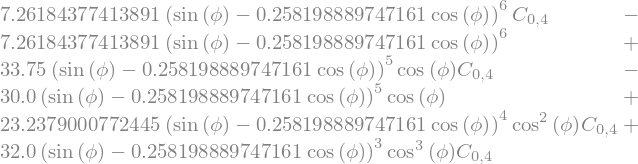

In [45]:
_residue

In [67]:
test = list(_residue.free_symbols)

In [71]:
C

NameError: name 'C' is not defined

In [96]:
_Cij = list((_residue.free_symbols - _residue.atoms(sp.Symbol)))[0]

In [94]:
_residue.atoms(sp.Symbol)

In [80]:
tuple(_residue.free_symbols)

In [97]:
_Cij = list((_residue.free_symbols - _residue.atoms(sp.Symbol)))[0]
test = sp.lambdify((henon.phi,_Cij),_residue**2)

In [108]:
_Cij.args

In [110]:
i

In [109]:
_, i,j = _Cij.args

In [42]:
scipy.optimize.minimize(avg_residue, x0=0).x

array([0.74666666])